#데이터 분석

##1. 데이터 읽어오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filepath = '/content/drive/MyDrive/3. 파이프라인/data/titanic_cleaning.csv'
df = pd.read_csv(filepath)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

##2. 데이터 구간화(data binning)
> 연령대 별로 생존 유무를 파악하려 한다. 다음과 같이 구간으로 분리해 보자
* 미성년 : 1 ~ 20
* 성년 : 21 ~ 60
* 노년 : 61 ~ 100


In [ ]:
#1 ~ 20, 21 ~ 60, 61 ~ 100
age_bins=[1,20,60,100]
age_labels=['미성년', '성년', '노년']

df['age_class'] = pd.cut(df['Age'], age_bins, labels=age_labels,)
df

>데이터를 범위로 구분하기 위해 cut함수를 이용했다. cut함수에서 bins는 별도로 구간을 나눌 수 있으며 labels는 구간에 별칭을 지정할 수 있다.

> 위의 코드에서 3개의 구간을 나누게 됨으로 age_bins를 1, 20, 60, 100으로 나누어 표현했다. 이렇게 진행하면 1 ~ 20, 21 ~ 60, 61 ~ 100으로 구분하는 것과 같다.

> 별도의 이름을 지정하고 위해 age_labels를 만들었다.

> 이렇게 만든 것을 age_class라는 feature에 저장했다.

In [ ]:
df.isnull().sum()

>실행 결과 age_class에 14개의 결측치가 발생되었다. 이는 범위를 벗어난 값이 존재한다는 것이다.

In [ ]:
df.describe()

> age 정보를 확인해 보니 최소값이 0.42로 1보다 작은 값이 존재한다. 결국 결측치가 14개였음으로 1보다 작은 값이 총 14개가 존재한다.

In [ ]:
df[df['Age']<1].describe()

> 실행 결과 1보다 작은 값은 7개가 존재한다.

In [ ]:
df[df['Age']<=1].describe()

> 1을 포함한 개수를 확인해 보니 14개가 나왔다.

> 결국 cut 함수에서 age_bins는 첫 1의 의미가 1 이상이 아닌 1 초과로 처리되는 것을 알 수 있다.

In [ ]:
#0<age<=20, 20<age<=60, 60<age<=100
age_bins=[0,20,60,100]
age_labels=['미성년', '성년', '노년']

df['age_class'] = pd.cut(df['Age'], age_bins, labels=age_labels,)
df.isnull().sum()

> 시작 나이가 1이 아닌 0으로 수정해야 정상적인 동작이 되게 된다.

##3. 데이터 필터링
> 데이터 가공 시 중복 데이터를 제거한다거나 필요한 데이터만 분류하는 경우가 자주 발생된다. 여기서는 이러한 필터링 방법에 대해 알아보자

###3.1 중복 제거

In [15]:
# df['age_class']
df['age_class'].unique()

['성년', '미성년', '노년']
Categories (3, object): ['미성년' < '성년' < '노년']

> unique함수를 이용하면 중복된 데이터를 제거할 수 있다.

###3.2 데이터 분류

In [ ]:
df[df['age_class'].isin(['미성년'])]

> isin 함수는 인자로 전달되는 리스트 정보가 포함된 데이터를 분류한다.

> 위의 코드는 age_class 중 미성년인 정보만 추출하는 코드이다.

In [ ]:
df[~df['age_class'].isin(['미성년'])]

> 보통 프로그램에서 틸트(~)는 not의 의미를 갖게된다. 위의 코드에서 ~를 적용하였기 때문에 '미성년이 배제되어 있는 모든 데이터를 추출해라' 라는 의미도 동작된다.

##4. 생존률 분석

###4.1 unstack
> 성별, 연령대별, 객실 등급별 생존률 확인

In [22]:
df_survived = df.groupby(['Sex', 'age_class', 'Pclass'])['Survived'].mean()
df_survived

Sex     age_class  Pclass
female  미성년        1         0.928571
                   2         1.000000
                   3         0.510638
        성년         1         0.974359
                   2         0.900000
                   3         0.489583
        노년         1         1.000000
                   2              NaN
                   3         1.000000
male    미성년        1         0.571429
                   2         0.526316
                   3         0.197368
        성년         1         0.388350
                   2         0.069767
                   3         0.119850
        노년         1         0.083333
                   2         0.333333
                   3         0.000000
Name: Survived, dtype: float64

>성별 기준으로 그룹한 후 연령대별, 객실 등급별 순으로 그룹화 한 후 생존데이터들에 대한 평균을 구하여 생존율을 얻었다. 하지만 보기가 어렵다. 이를 해결하기 위해 다음과 같이 unstack 함수를 이용한다.

In [24]:
df_survived.unstack('Pclass')

Pclass                   1         2         3
Sex    age_class                              
female 미성년        0.928571  1.000000  0.510638
       성년         0.974359  0.900000  0.489583
       노년         1.000000       NaN  1.000000
male   미성년        0.571429  0.526316  0.197368
       성년         0.388350  0.069767  0.119850
       노년         0.083333  0.333333  0.000000

> unstack은 열을 행으로 변환하는 기능을 한다. 이전 코드에서 Pclass가 열로 되어 있는 부분을 이번 코드에서 행으로 변환하여 출력했다.

In [23]:
df_survived.unstack('age_class')

age_class           미성년        성년        노년
Sex    Pclass                              
female 1       0.928571  0.974359  1.000000
       2       1.000000  0.900000       NaN
       3       0.510638  0.489583  1.000000
male   1       0.571429  0.388350  0.083333
       2       0.526316  0.069767  0.333333
       3       0.197368  0.119850  0.000000

###4.2 pivot_table
> 성별에 따른 생존율 확인

In [ ]:
df.pivot_table(['Survived'], index=['Sex'])

>pivot_table은 행과 열을 입력받아 새로운 데이터를 구성하는 함수이다. 위의 실행 결과 여성의 생존율이 높은 것을 알 수 있다.

In [26]:
df.pivot_table(['Survived'], index=['Sex', 'Pclass'])

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

##5. 자동 보고서 만들기
> colab에서는 기본적으로 pandas-profiling이 설치되어 있지만 버전이 낮아 profile_report()함수를 사용할 수 없다. 

>다음과 같이 pip를 이용하여 업데이트 한후 report를 확인해 보자.

In [ ]:
!pip install -U pandas-profiling

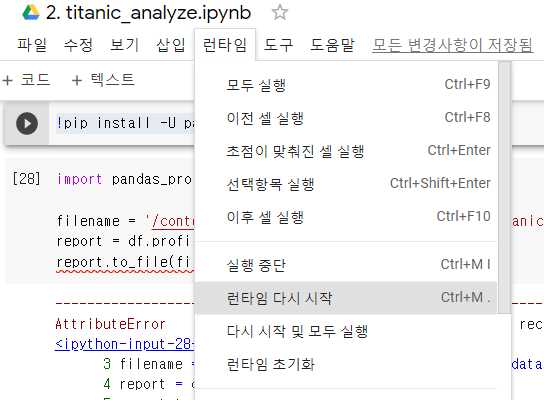

> 위의 명령어 실행 이후 메뉴에서 런타임 -> 런타임 다시 시작을 진행해야 한다.

In [ ]:
import pandas_profiling

filename = '/content/drive/MyDrive/3. 파이프라인/data/titanic_report.html'
report = df.profile_report()
report.to_file(filename)